In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
%matplotlib inline

### Loading the data

In [2]:
stats_df = pd.read_csv('NBA_clean_data.csv')

#Drop columns that won't help our model
stats_df.drop(["Player", "Year","Pos", "Tm", "Age","GS"],axis=1, inplace = True)
stats_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
0,61.0,737.0,124.0,228.0,0.544,0.0,1.0,0.000,124.0,227.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64
1,58.0,1605.0,189.0,308.0,0.614,0.0,3.0,0.000,189.0,305.0,...,213.0,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29
2,64.0,2143.0,456.0,800.0,0.570,2.0,8.0,0.250,454.0,792.0,...,142.0,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39
3,26.0,674.0,140.0,296.0,0.473,31.0,80.0,0.388,109.0,216.0,...,19.0,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82
4,46.0,1007.0,192.0,458.0,0.419,76.0,219.0,0.347,116.0,239.0,...,13.0,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,61.0,972.0,160.0,405.0,0.395,12.0,41.0,0.293,148.0,364.0,...,25.0,63.0,88.0,66.0,42.0,11.0,49.0,100.0,394.0,10.00
12169,62.0,1421.0,306.0,550.0,0.556,0.0,5.0,0.000,306.0,545.0,...,49.0,136.0,185.0,96.0,39.0,46.0,73.0,160.0,788.0,19.81
12170,80.0,2960.0,711.0,1298.0,0.548,15.0,49.0,0.306,696.0,1249.0,...,160.0,318.0,478.0,288.0,99.0,49.0,160.0,190.0,1685.0,22.09
12171,82.0,1393.0,138.0,328.0,0.421,16.0,59.0,0.271,122.0,269.0,...,29.0,93.0,122.0,231.0,82.0,4.0,80.0,84.0,383.0,13.22


### Linear Regresion

In [3]:
#Split the dataframe to train and test
X_train1,X_test1,y_train1,y_test1 = train_test_split(stats_df.drop(['PER'],axis=1),stats_df['PER'],test_size=0.3,random_state=42)

In [4]:
#Fit the model
lr = linear_model.LinearRegression()
lr.fit(X_train1,y_train1)


LinearRegression()

In [5]:
#Predict the outcome
y_pred1 = lr.predict(X_test1)
y_pred1

array([16.98683019, 11.05693766,  5.37860682, ...,  9.0660549 ,
       18.92641479, 13.70328535])

In [6]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test1,y_pred1)}')
print(f'mse: {metrics.mean_squared_error(y_test1,y_pred1)}')


r^2: 0.8813846791129788
mse: 2.425004267627439


Text(0, 0.5, 'Predicted')

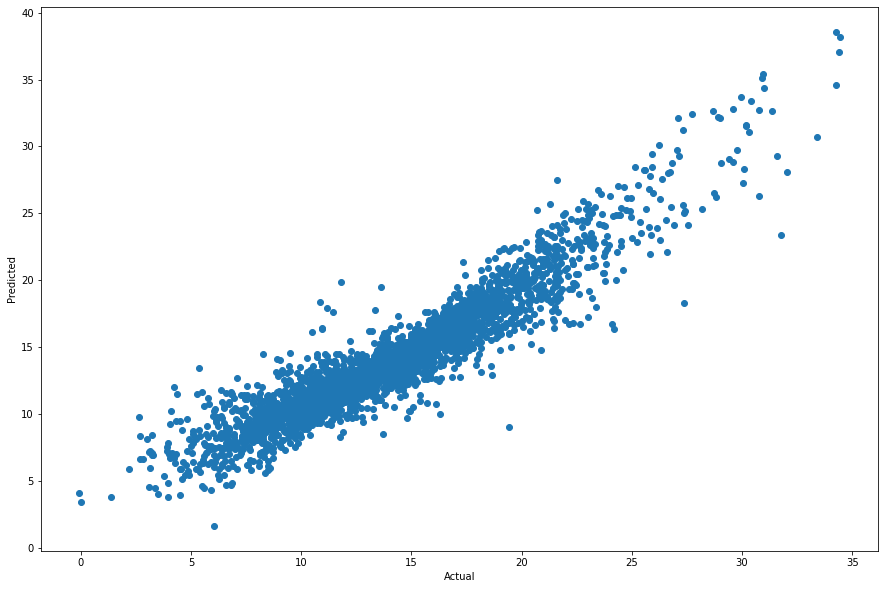

In [7]:
#We can see that our model predicted the PER with good results
plt.figure(figsize=(15,10))
plt.scatter(y_test1,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [8]:
#Check the difference between the predicted value and the actual value
compare_df = pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1,'Difference':abs(y_test1-y_pred1)})
compare_df

,Actual,Predicted,Difference
5739,17.61,16.986830,0.623170
2628,9.79,11.056938,1.266938
6108,3.79,5.378607,1.588607
3105,10.39,11.809248,1.419248
7907,14.20,14.695596,0.495596
...,...,...,...
1242,16.76,15.437742,1.322258
420,22.65,16.730680,5.919320
9592,7.32,9.066055,1.746055
9197,19.10,18.926415,0.173585


### Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
dectree = DecisionTreeRegressor()

In [11]:
#Split the dataframe to train and test
X_train2,X_test2,y_train2,y_test2 = train_test_split(stats_df.drop(['PER'],axis=1),stats_df['PER'],test_size=0.3,random_state=42)

In [12]:
#Fit the model
DecisionTreeRegressor(random_state=42)
dectree.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [13]:
#Predict the outcome
y_pred2 = dectree.predict(X_test2)
y_pred2

array([18.02,  7.94,  6.37, ...,  7.42, 18.94, 15.08])

In [14]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test2,y_pred2)}')
print(f'mse: {metrics.mean_squared_error(y_test2,y_pred2)}')


r^2: 0.6458571690015732
mse: 7.240193510405257


Text(0, 0.5, 'Predicted')

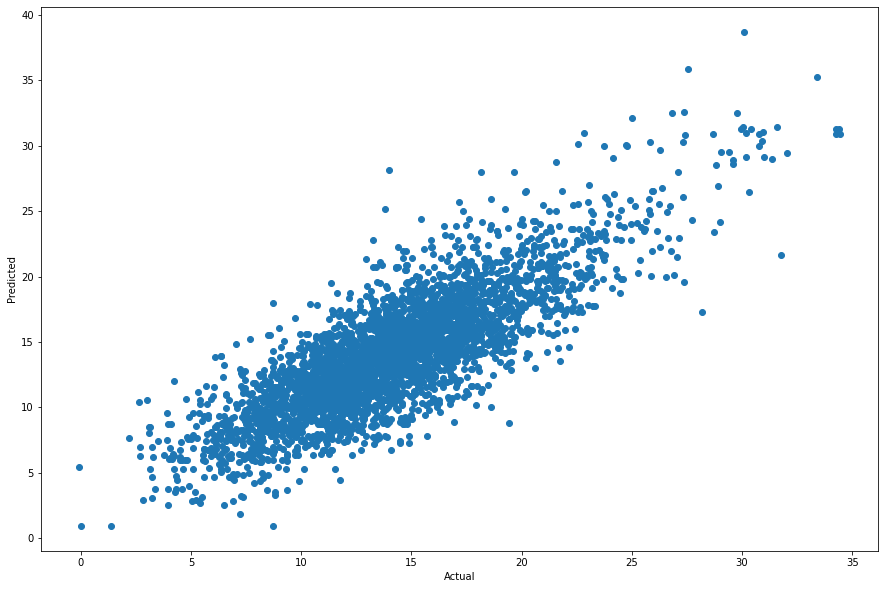

In [15]:
#We can see that our model predicted the PER with less better results
plt.figure(figsize=(15,10))
plt.scatter(y_test2,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [16]:
#Check the difference between the predicted value and the actual value
compare_df2 = pd.DataFrame({'Actual':y_test2,'Predicted':y_pred2,'Difference':abs(y_test2-y_pred2)})
compare_df2

,Actual,Predicted,Difference
5739,17.61,18.02,0.41
2628,9.79,7.94,1.85
6108,3.79,6.37,2.58
3105,10.39,7.70,2.69
7907,14.20,13.42,0.78
...,...,...,...
1242,16.76,13.04,3.72
420,22.65,17.66,4.99
9592,7.32,7.42,0.10
9197,19.10,18.94,0.16


### Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
rndfor= RandomForestRegressor()

In [18]:
#Split the dataframe to train and test
X_train3,X_test3,y_train3,y_test3 = train_test_split(stats_df.drop(['PER'],axis=1),stats_df['PER'],test_size=0.3,random_state=42)

In [19]:
#Fit the model
RandomForestRegressor(random_state=42)
rndfor.fit(X_train3,y_train3)


RandomForestRegressor()

In [20]:
#Predict the outcome
y_pred3 = rndfor.predict(X_test3)
y_pred3

array([16.0692,  9.6578,  5.7078, ...,  9.1876, 17.8702, 13.0571])

In [21]:
#Check the results of the model
print(f'r^2: {metrics.r2_score(y_test3,y_pred3)}')
print(f'mse: {metrics.mean_squared_error(y_test3,y_pred3)}')

r^2: 0.8570025615060483
mse: 2.9234789908625416


Text(0, 0.5, 'Predicted')

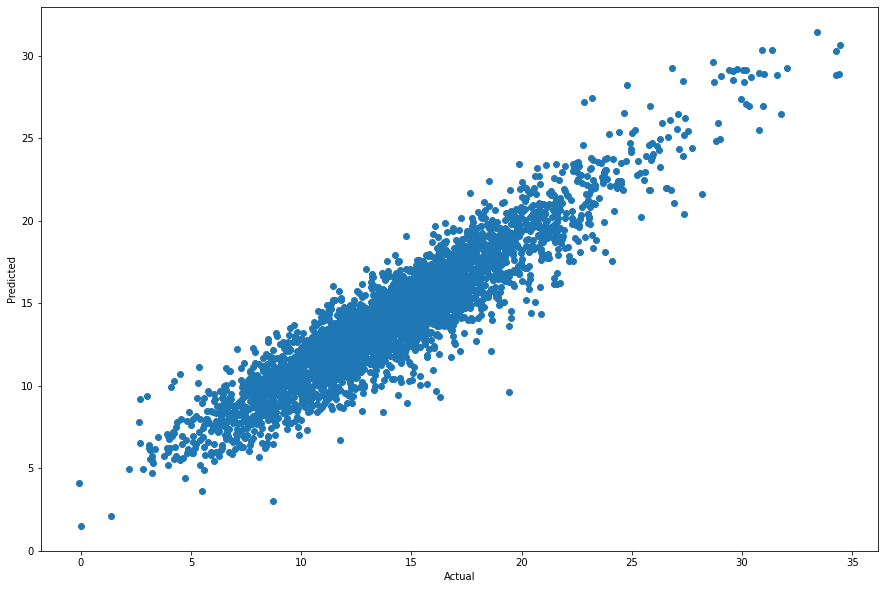

In [22]:
#We can see that our model predicted the PER with almost as good as linear regression results
plt.figure(figsize=(15,10))
plt.scatter(y_test3,y_pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [23]:
#Check the difference between the predicted value and the actual value
compare_df3 = pd.DataFrame({'Actual':y_test3,'Predicted':y_pred3,'Difference':abs(y_test3-y_pred3)})
compare_df3

,Actual,Predicted,Difference
5739,17.61,16.0692,1.5408
2628,9.79,9.6578,0.1322
6108,3.79,5.7078,1.9178
3105,10.39,9.4485,0.9415
7907,14.20,14.6787,0.4787
...,...,...,...
1242,16.76,14.6388,2.1212
420,22.65,18.0824,4.5676
9592,7.32,9.1876,1.8676
9197,19.10,17.8702,1.2298


### MSE and R^2 score comparison

In [24]:
#Create dataframe for comparison of algorithms
r2_mse_comp_data = {'r^2':[metrics.r2_score(y_test1,y_pred1),metrics.r2_score(y_test2,y_pred2),metrics.r2_score(y_test3,y_pred3)],
                  'MSE':[metrics.mean_squared_error(y_test1,y_pred1),metrics.mean_squared_error(y_test2,y_pred2),
                         metrics.mean_squared_error(y_test3,y_pred3)]}
r2_mse_comp_df= pd.DataFrame(r2_mse_comp_data,index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'])
r2_mse_comp_df

,r^2,MSE
Linear Regression,0.881385,2.425004
Decision Tree Regressor,0.645857,7.240194
Random Forest Regressor,0.857003,2.923479


Text(0, 0.5, 'Value')

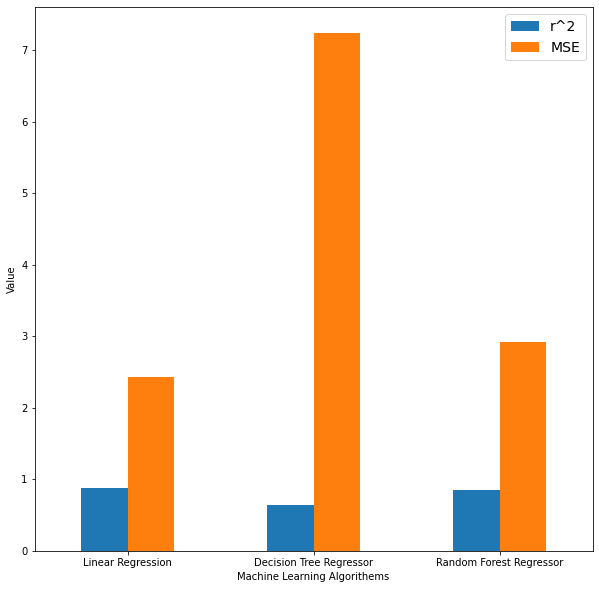

In [25]:
#We can see that the best algorithem is the one with the largest r^2 score and the minimal MSE score, meaning Linear Regression.
r2_mse_comp_df.plot.bar(rot=0,figsize=(10,10))
plt.legend(fontsize = 14)
plt.xlabel('Machine Learning Algorithems')
plt.ylabel('Value')

### We can see that the Linear Regression has the besr r^2 score and the lowest mean square error